<a href="https://colab.research.google.com/github/Aya-Jafar/Python/blob/main/fashion_predection_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Uploading & Splitting the data set

In [2]:
dataset = tf.keras.datasets.fashion_mnist

In [3]:
# Splitting the data
(train_img,train_lable) , (test_img,test_lable) = dataset.load_data() 
print(f"Train data size : {train_img.shape}\nTest data size : {test_img.shape}")

Train data size : (60000, 28, 28)
Test data size : (10000, 28, 28)


In [4]:
train_lable.shape

(60000,)

(array([6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000.,
        6000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

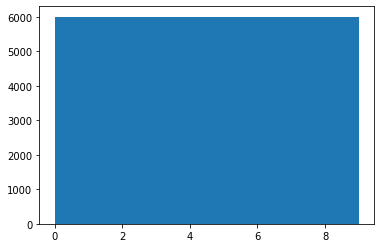

In [5]:
plt.hist(train_lable)

Luckly, we have a balanced data set 

# Data Processing 

## Normilizarion

In [6]:
train_img[0] # the value of each pixel between 0-255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

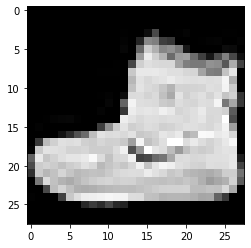

In [7]:
plt.imshow(train_img[0],cmap='gray')

In [8]:
# Normalization, Making values between 0 and 1
train_img = train_img/255.0
test_img = test_img/255.0
train_img[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

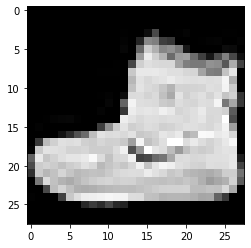

In [9]:
plt.imshow(train_img[0],cmap='gray') 

The image stayes the same after Normilization

# Building The Model

In [148]:
# Making the model of nueral network
model = keras.Sequential(
    [
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),# from 28*28 to 1d array or vector 
    tf.keras.layers.Dense(units=256,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3), # for avoiding overfitting
    tf.keras.layers.Dense(units=512,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)                   
   ]
)

In [149]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 512)               131584    
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                5130      
                                                                 
Total params: 337,674
Trainable params: 337,674
Non-tr

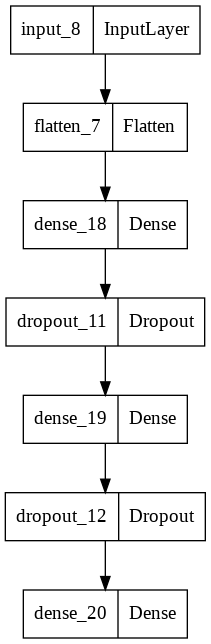

In [150]:
tf.keras.utils.plot_model(model)

In [151]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy']) # Learning process

In [160]:
# training the dataset
model.fit(train_img,train_lable,batch_size=32,epochs=5,validation_split=0.1)  

Epoch 1/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3530 - accuracy: 0.8695 - val_loss: 0.3370 - val_accuracy: 0.8773
Epoch 2/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3464 - accuracy: 0.8737 - val_loss: 0.3452 - val_accuracy: 0.8767
Epoch 3/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3336 - accuracy: 0.8783 - val_loss: 0.3217 - val_accuracy: 0.8838
Epoch 4/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3275 - accuracy: 0.8785 - val_loss: 0.3423 - val_accuracy: 0.8805
Epoch 5/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3237 - accuracy: 0.8807 - val_loss: 0.3206 - val_accuracy: 0.8858


When the model is done training, you will see an accuracy value at the end of the final epoch. It might look something like 0.8926 as above. This tells you that your neural network is about 89% accurate in classifying the training data. In other words, it figured out a pattern match between the image and the labels that worked 89% of the time. Not great, but not bad considering it was only trained for five epochs and done quickly.

In [161]:
model.evaluate(test_img, test_lable)# testing

313/313 [==============================] - 1s 3ms/step - loss: 0.3377 - accuracy: 0.8774


[0.3376578688621521, 0.8773999810218811]

In [162]:
pred = model.predict(test_img)
pred

array([[5.7717057e-07, 2.3932077e-07, 2.8635174e-08, ..., 4.9255215e-02,
        4.0874415e-06, 9.4945514e-01],
       [2.3284483e-05, 5.5919772e-11, 9.8746431e-01, ..., 2.8922061e-15,
        5.2856930e-10, 2.2558255e-13],
       [1.1080493e-13, 1.0000000e+00, 2.9315194e-20, ..., 1.3794165e-27,
        1.8280492e-21, 3.0053200e-22],
       ...,
       [2.0696216e-04, 9.8130248e-10, 1.2550824e-05, ..., 4.4195689e-10,
        9.9966192e-01, 1.7084245e-11],
       [2.6485895e-12, 1.0000000e+00, 5.6097027e-17, ..., 8.6656961e-19,
        3.4374232e-15, 3.0969001e-15],
       [2.8833060e-06, 1.5097366e-10, 2.2150040e-08, ..., 4.7398051e-03,
        8.9930209e-06, 4.5243687e-06]], dtype=float32)

In [163]:
pred[0] #returns an array of all probabilities of this item of the 10 classes

array([5.7717057e-07, 2.3932077e-07, 2.8635174e-08, 6.0618824e-08,
       2.7159956e-07, 1.2843553e-03, 4.8921063e-08, 4.9255215e-02,
       4.0874415e-06, 9.4945514e-01], dtype=float32)

In [164]:
np.sum(pred[0])

1.0

#### Predicted Vs The Actual Value

In [142]:
np.argmax(pred[0])  # The highest probability of the predicted value being of index 9 or label 9

9

In [117]:
test_lable[0] # The actual value

9

In [105]:
np.argmax(pred[1]) 

2

In [106]:
test_lable[1] 

2

In [170]:
pred = model.predict(test_img[:50])

In [171]:
np.argmax(pred,axis=-1)

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 2, 8, 0, 2, 5,
       7, 5, 1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 0, 7,
       6, 7, 2, 1, 2, 6])

In [172]:
test_lable[:50]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7,
       6, 7, 2, 1, 2, 2], dtype=uint8)

In [24]:
# argmax
def find_label_index(probability_arr, arr_index):
  for i in probability_arr[arr_index]:
    if i == max(probability_arr[arr_index]):
      print(np.where(probability_arr[arr_index] == i))

find_label_index(pred,0)

(array([9]),)


### Callbacks
it'd be nice and time saving if you could stop the training when you reach a desired value, such as 95% accuracy.


In [110]:

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True


In [111]:
callbacks = myCallback()

In [112]:
# Train your model again by setting the callbacks parameter
model.fit(train_img, train_lable, batch_size=32,epochs=5, callbacks=[callbacks],validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 8s 4ms/step - loss: 0.3287 - accuracy: 0.8780 - val_loss: 0.3342 - val_accuracy: 0.8777
Epoch 2/5
1688/1688 [==============================] - 8s 4ms/step - loss: 0.3170 - accuracy: 0.8821 - val_loss: 0.3196 - val_accuracy: 0.8828
Epoch 3/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3087 - accuracy: 0.8872 - val_loss: 0.3199 - val_accuracy: 0.8835
Epoch 4/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3035 - accuracy: 0.8870 - val_loss: 0.3522 - val_accuracy: 0.8783
Epoch 5/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2968 - accuracy: 0.8901 - val_loss: 0.3214 - val_accuracy: 0.8800
